# Marriott Hotel Category Change 2020 Analysis

In [4]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# read data from csv
df = pd.read_csv('marriott-category-changes-2020.csv')    

## Question 1
Show the information of the dataset and describe the data types for each feature/column, e.g., xxx feature is a categorical feature with data type object/String, etc.

###  The code for Q1

In [6]:
# show info
print(df.info())

# Describe the data types for each feature/column
for column in df.columns:
    data_type = df[column].dtype
    print(f"{column} feature is a categorical feature with data type {data_type}.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   hotel             2182 non-null   object
 1   brand             2182 non-null   object
 2   destination       2182 non-null   object
 3   current_category  2182 non-null   int64 
 4   current_price     2182 non-null   int64 
 5   new_category      2182 non-null   int64 
 6   new_price         2182 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 119.5+ KB
None
hotel feature is a categorical feature with data type object.
brand feature is a categorical feature with data type object.
destination feature is a categorical feature with data type object.
current_category feature is a categorical feature with data type int64.
current_price feature is a categorical feature with data type int64.
new_category feature is a categorical feature with data type int64.
new_price feature is a

### The answers to the Q1

In this dataset, we have 2182 entries and 7 features for each hotel. 

- "__Hotel__" tells us the name of the hotel. The data type of this column is object/string
- "__Brand__" gives us the brand information. The data type of this column is "object/string".
- "__Destination__" shows the country where this hotel is located. The data type of this column is object/string.
- "__Current Category__" and "__New Category__" correspond to the hotel's category in 2019 and 2020. The data type for both columns is int/integer.
- "__Current Standard Price__" and "__New Standard Price__" reflect the required reward points based on the _current category_ or _new category_. The data type for both columns is int/integer. 

## Question 2
- How many hotels are in this dataset?
- How many unique brands those hotels belong to?
- Which destination/country has the most hotels listed in this dataset? List the total number of hotels in that country
- How many brands in China have hotel category changes?

### The code for Q2

In [7]:
# How many hotels are in this dataset? 2182
num_hotels = len(df['hotel'].unique())
print(f"There are {num_hotels} hotels in this dataset.")

There are 2182 hotels in this dataset.


In [8]:
# The hotels are from how many unique brands? 30
num_unique_brands = len(df['brand'].unique())
print(f"The hotels are from {num_unique_brands} unique brands.")

The hotels are from 30 unique brands.


In [9]:
# Which destination/country has the most hotels listed in this dataset? List the total number of hotels in that country
# USA with 1545 affected hotels
# assume destination count is the same as the hotel count
country_hotel_counts = df['destination'].value_counts()
new_df = pd.DataFrame({'country': country_hotel_counts.index, 'hotel_count': country_hotel_counts.values})
total_hotels = country_hotel_counts.max()
most_hotels_country = new_df[new_df['hotel_count'] == total_hotels]['country'].values[0]

print(f"The {most_hotels_country} has the most hotels listed with a total of {total_hotels} hotels.")

The USA has the most hotels listed with a total of 1545 hotels.


In [10]:
# How many brands in China have hotel category changes?
brands_in_china = df[df['destination'] == 'China']['brand'].unique()
num_brands_in_china_with_changes = len(brands_in_china)
print(f"There are {num_brands_in_china_with_changes} brands in China that have hotel category changes.")

There are 14 brands in China that have hotel category changes.


### The answers to the Q2

- There are 2182 hotels in this dataset.
- The hotels are from 30 unique brands.
- The USA has the most hotels listed with a total of 1545 hotels.
- There are 14 brands in China that have hotel category changes.

## Question 3
- What's the average price (based on the new price) of each brand? What are the top 3 most expensive brands? Create a bar plot (use pandas plotting) to visualize the result with the following requirements:
    - set figure size to (15, 5)
    - set title, x/y label
    - use seaborn style

The diagram should look like:

![output](https://user-images.githubusercontent.com/595772/157926463-442511ff-59c1-425f-88f0-0825d7c03917.png)



### The code for Q3

In [11]:
# get average price and sort by brand
avg_price = df.groupby('brand')['new_price'].mean()

df_avg_price = pd.DataFrame({'brand': avg_price.index, 'avg_price': avg_price.values})
df_avg_price_1 = df_avg_price.sort_values(by='avg_price', ascending=False, ignore_index=True)
df_avg_price_1.iloc[0:3]

,brand,avg_price
0,Ritz-Carlton,66724.137931
1,VISTA,65000.000000
2,Edition,65000.000000


<Figure size 1500x500 with 0 Axes>

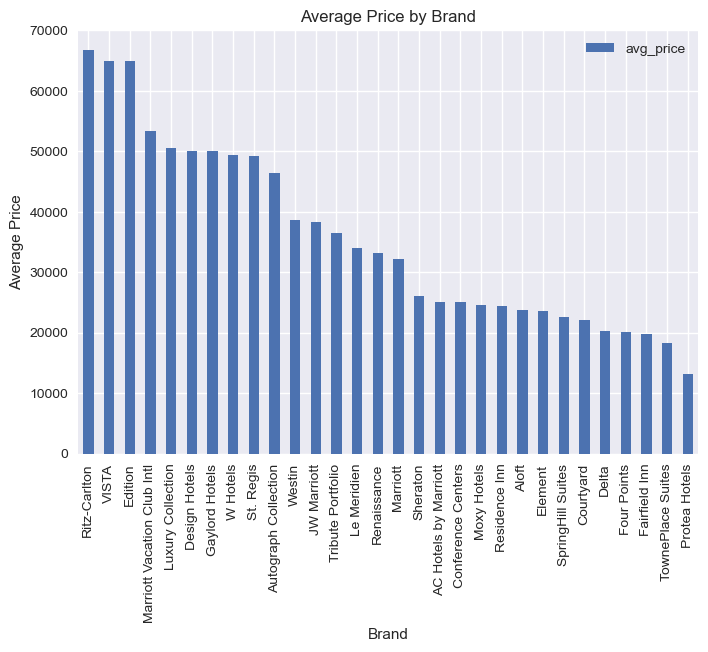

In [12]:
# plot average price by brand
plt.figure(figsize=(15, 5))
plt.style.use('seaborn')
df_avg_price_1.plot.bar().set_xticks(df_avg_price_1.index, df_avg_price_1.brand)
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

### The answers to Q3

- The top3 most expensive brands are:
   * Ritz-Carlton
   * VISTA
   * Edition
- The diagram is:
   * 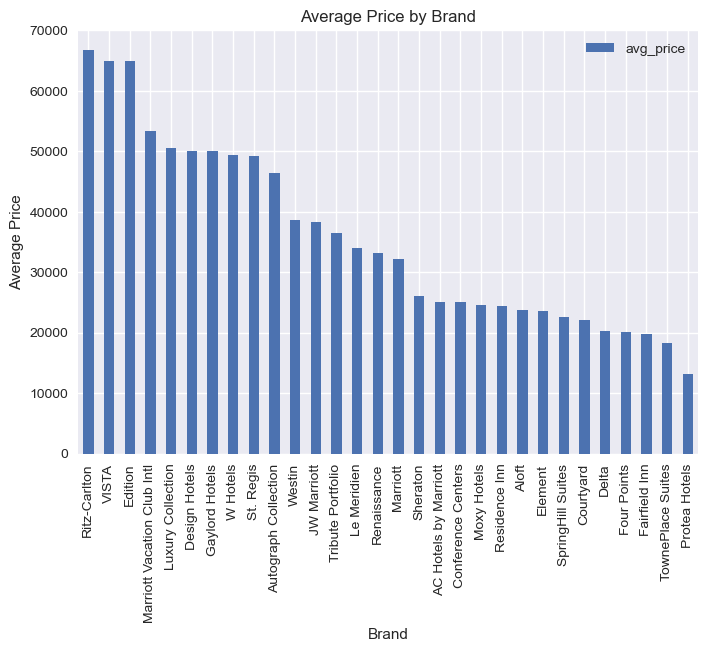

## Question 4

Create a bar plot to show the totoal number of hotels located in USA in each brand. Hint: use value_counts()

Make sure to set title, x/y label and figure size to (20, 5)

The plot should look like:
![output](https://user-images.githubusercontent.com/595772/157925825-79ffe783-1dc0-4734-a2f3-435eb80525d4.png)


### The code for Q4

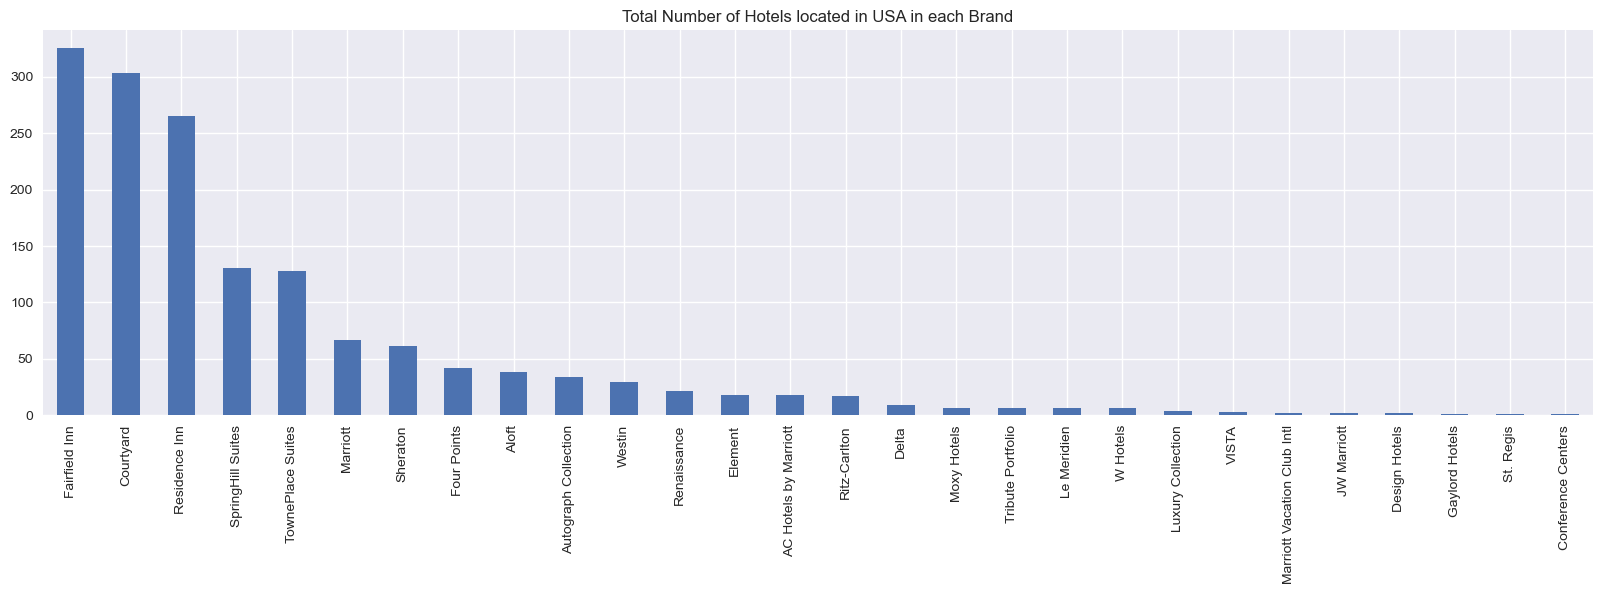

In [13]:
# plot hotel counts
usa_hotels = df[df['destination'] == 'USA']
brand_counts = usa_hotels['brand'].value_counts()

plt.figure(figsize=(20, 5))
brand_counts.plot.bar()
plt.title('Total Number of Hotels located in USA in each Brand')
plt.show()

## Question 5
- What's the percentage of hotels worldwide with category **upgrade** (note that the total hotels were given in the assignment instruction) in 2020?

### The code for Q5

In [14]:
# total hotel 7737 - this is hardcoded value from Marriott website
upgrade_hotels = df[(df['new_category'] > df['current_category'])]
percentage_upgrade = (len(upgrade_hotels) / 7737) * 100
print(f"The percentage of hotels worldwide with the category upgrade in 2020 is: {percentage_upgrade}%")

The percentage of hotels worldwide with the category upgrade in 2020 is: 21.752617293524622%


### The answers for Q5

The percentage of hotels worldwide with the category upgrade in 2020 is : 21.752617293524622%

## Question 6
- List hotels with category changes greater than 1 if any, such as changing from category 3 to 5 or from category 7 to 4
- List all JW Marriott hotels in China that have a category upgrade

In [15]:
# it may be useful to have to two more calculated columns
upgrade_hotels_changing = df[(df['new_category'] - df['current_category'] > 1)]
downgrade_hotels_changing = df[(df['new_category'] - df['current_category'] < -1)]
upgrade_hotels_changing
downgrade_hotels_changing

,hotel,brand,destination,current_category,current_price,new_category,new_price
911,"Four Points by Sheraton Bali, Ungasan",Four Points,Indonesia,4,25000,2,12500


In [16]:
# combine the solution above into one
combine_df = pd.concat([upgrade_hotels_changing, downgrade_hotels_changing], ignore_index=True)
combine_df

,hotel,brand,destination,current_category,current_price,new_category,new_price
0,"Four Points by Sheraton Bali, Ungasan",Four Points,Indonesia,4,25000,2,12500


In [17]:
# all JW Marriott hotels in China that have a category upgrade
upgrade_hotels_in_China = df[(df['new_category'] > df['current_category']) & (df['destination'] == 'China')]
upgrade_hotels_in_China

,hotel,brand,destination,current_category,current_price,new_category,new_price
82,Aloft Guangzhou Tianhe,Aloft,China,2,12500,3,17500
83,Aloft Guangzhou University Park,Aloft,China,1,7500,2,12500
469,Courtyard Shanghai-Pudong,Courtyard,China,2,12500,3,17500
470,Courtyard Shenzhen Bay,Courtyard,China,2,12500,3,17500
484,Courtyard Suzhou,Courtyard,China,2,12500,3,17500
485,Courtyard Suzhou Mudu,Courtyard,China,1,7500,2,12500
919,"Four Points by Sheraton Chengdu, Pujiang Resort",Four Points,China,1,7500,2,12500
938,"Four Points by Sheraton Guangzhou, Dongpu",Four Points,China,2,12500,3,17500
940,"Four Points by Sheraton Hefei, Shushan",Four Points,China,1,7500,2,12500
941,Four Points by Sheraton Heyuan Resort,Four Points,China,3,17500,4,25000


## Question 7
Assume you are in Feburary 2020 and the category changes will take effect on March 4, 2020. You are planning your trip to Florence, Italy and Hong Kong, China in April. You only stay in category 8 hotel (or category 7 hotel that is downgraded from 8 within 3 months) and want to optimize your point spending. Based on the data, which hotel you should book? when should you book your hotels for Florence and Hong Kong? Why?

In [18]:
# choose the category_hotel
category_8_hotel = df[(df['new_category'] == 8) & ((df['hotel'].str.contains('Hong Kong')) | (df['hotel'].str.contains('Florence')))]
category_7_hotel = df[(df['new_category'] == 7) & (df['current_category'] == 8) & ((df['hotel'].str.contains('Hong Kong')) | (df['hotel'].str.contains('Florence')))]
category_hotel = pd.concat([category_8_hotel, category_7_hotel], ignore_index=True)
category_hotel

,hotel,brand,destination,current_category,current_price,new_category,new_price
0,"The Westin Excelsior, Florence",Westin,Italy,7,60000,8,85000
1,W Hong Kong,W Hotels,China,8,85000,7,60000


In [19]:
# find the optimal spending
optimal_spending = category_hotel['current_price'].min()
best_choice = category_hotel[category_hotel['current_price'] == optimal_spending]
best_choice

,hotel,brand,destination,current_category,current_price,new_category,new_price
0,"The Westin Excelsior, Florence",Westin,Italy,7,60000,8,85000


As we can see in the DataFrame above, the optimal choice is :
- The Westin Excelsior, Florence